In [ ]:
# Connect to the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import library
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt

In [ ]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving Tiantan.csv to Tiantan.csv


In [ ]:
data=read_csv("Tiantan.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Tiantan.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset=dataset.fillna(method="pad")
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
2013-03-01 01:00:00,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2013-03-01 02:00:00,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
2013-03-01 03:00:00,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
2013-03-01 04:00:00,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,20.0,48.0,2.0,21.0,500.0,94.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,11.0,34.0,3.0,36.0,500.0,94.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_train.shape)
print(X_test.shape)

(26300, 4, 12, 1)
(8760, 4, 12, 1)


In [ ]:
#CNN+LSTM model building process
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=5, activation='relu'), input_shape=(None, X_train.shape[2], X_train.shape[3])))

model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))

model_cnn_lstm.add(LSTM(50, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))

model_cnn_lstm.add(LSTM(50, activation='relu', return_sequences = True))
model_cnn_lstm.add(Dropout(0.2))

model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dropout(0.2))

model_cnn_lstm.add(Dense(50))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

In [ ]:
#CNN+LSTM model
history= model_cnn_lstm.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
411/411 [==============================] - 16s 23ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 2/100
411/411 [==============================] - 9s 22ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 3/100
411/411 [==============================] - 11s 27ms/step - loss: 0.0011 - val_loss: 7.8263e-04
Epoch 4/100
411/411 [==============================] - 10s 25ms/step - loss: 9.2334e-04 - val_loss: 7.4852e-04
Epoch 5/100
411/411 [==============================] - 9s 22ms/step - loss: 8.7095e-04 - val_loss: 7.3267e-04
Epoch 6/100
411/411 [==============================] - 11s 27ms/step - loss: 8.2861e-04 - val_loss: 7.6608e-04
Epoch 7/100
411/411 [==============================] - 9s 22ms/step - loss: 8.3010e-04 - val_loss: 8.0248e-04
Epoch 8/100
411/411 [==============================] - 9s 22ms/step - loss: 7.9991e-04 - val_loss: 7.0225e-04
Epoch 9/100
411/411 [==============================] - 9s 22ms/step - loss: 7.6578e-04 - val_loss: 7.2331e-04
Epoch 10/100
411/411 [====

In [ ]:
from keras.models import load_model
model_cnn_lstm.save('AirPollutionCNNLSTM.h5')

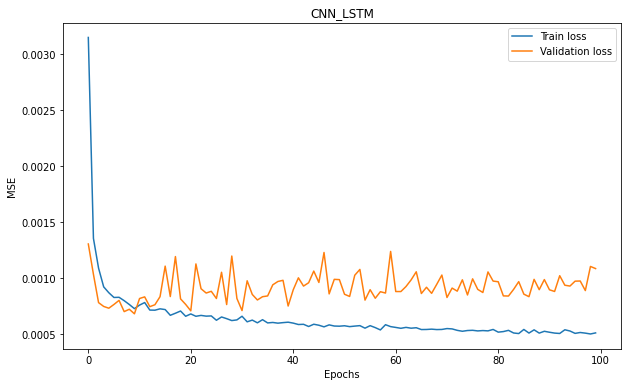

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("CNN_LSTM")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model_cnn_lstm.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 1s 8ms/step
RMSE at 40 = 14.729912
RMAE at 40 = 3.6969123
MAPE at 40 = 1.9277878
R2 at 40 = -0.15457154597481604
2/2 [==============================] - 0s 7ms/step
RMSE at 45 = 14.6541195
RMAE at 45 = 3.6754243
MAPE at 45 = 1.7308829
R2 at 45 = 0.5927658985274172
2/2 [==============================] - 0s 8ms/step
RMSE at 50 = 15.571061
RMAE at 50 = 3.7391427
MAPE at 50 = 1.577513
R2 at 50 = 0.7680204835200722
2/2 [==============================] - 0s 8ms/step
RMSE at 55 = 15.264978
RMAE at 55 = 3.6993845
MAPE at 55 = 1.4465479
R2 at 55 = 0.7942882574526382
2/2 [==============================] - 0s 9ms/step
RMSE at 60 = 15.632475
RMAE at 60 = 3.6820092
MAPE at 60 = 1.336055
R2 at 60 = 0.8009637608944384
3/3 [==============================] - 0s 5ms/step
RMSE at 65 = 15.456016
RMAE at 65 = 3.6562474
MAPE at 65 = 1.2420404
R2 at 65 = 0.8237857659267829
3/3 [==============================] - 0s 6ms/step
RMSE at 70 = 16.871054
RMAE at 70 = 3.771986
MAP

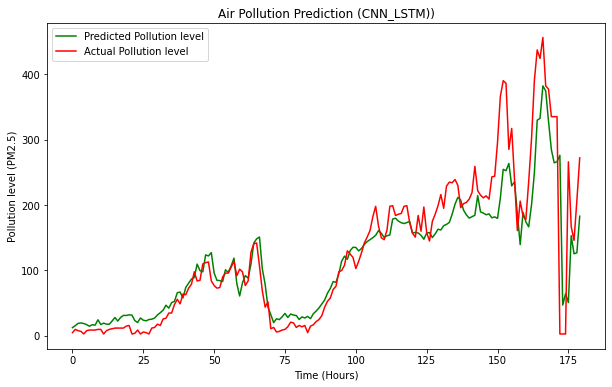

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (CNN_LSTM))")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphCNNLSTM.png')

In [ ]:
savetxt('Predict_CNN_LSTM.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_CNN_LSTM.csv', Y_test, delimiter=',')